<a href="https://colab.research.google.com/github/anuj-m-sharma/web-scrape/blob/main/Web_Scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Web scrape is defined as extracting information from the web pages. urllib.request and BeautifulSoup libraries can be used for performing web scrape. I have reffered the following link: https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue. We parse HTML and store it. We extract values from the table. We retrive the data from table by extracting data from 'tr' and 'td'.**

# Web scraped Google for the companies registered in USA

In [2]:
import urllib.request
import requests
import numpy as np
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')

In [3]:
tables = soup.find_all('table')

In [4]:

C_name = []
I_industry = []

for table in tables:
    rows = table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        
        if len(cells) > 2:
            name = cells[1]
            C_name.append(name.text.strip())
            
            country = cells[2]
            I_industry.append(country.text.strip())

In [8]:
df1 = pd.DataFrame(I_industry,C_name)

df1.columns = ['Industry Type']
df1

,Industry Type
Walmart,Retail
Amazon,Retail
Apple Inc.,Electronics industry
CVS Health,Healthcare
ExxonMobil,Petroleum industry
...,...
Fannie Mae,Financials
AT&T,Conglomerate
UnitedHealth Group,Healthcare
Comcast,Telecommunications


In [10]:
df1.to_csv('Final_List_Of_Companies.csv')

In [30]:
import matplotlib.pyplot as plt
x= df1['Industry Type'].value_counts()
y = x.to_frame()


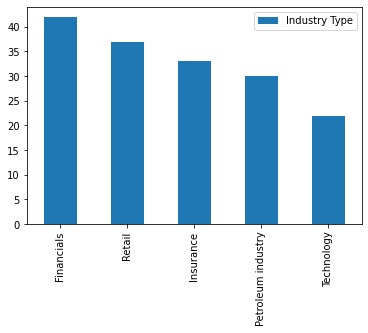

In [31]:
y.head().plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0aa96d9d0>],
      dtype=object)

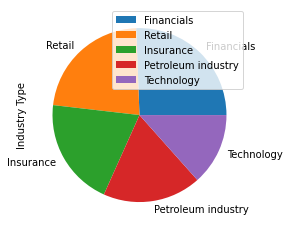

In [32]:
y.head().plot.pie(subplots=True)